In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math

### Price Determination

In [2]:
# We assume price will rise as the Rf does
def forward_price(S0, Rf, T) :
    return S0*math.exp(Rf*T)

def pv_of_forward_contract(F0, K, Rf, T) :
    return (F0-K)*math.exp(-Rf*T)

F0 = forward_price(25, 0.1, 0.5)
print(F0)
print(pv_of_forward_contract(F0, 25, 0.1, 0.5))

26.281777409400604
1.2192643874821527


### Positions on Options

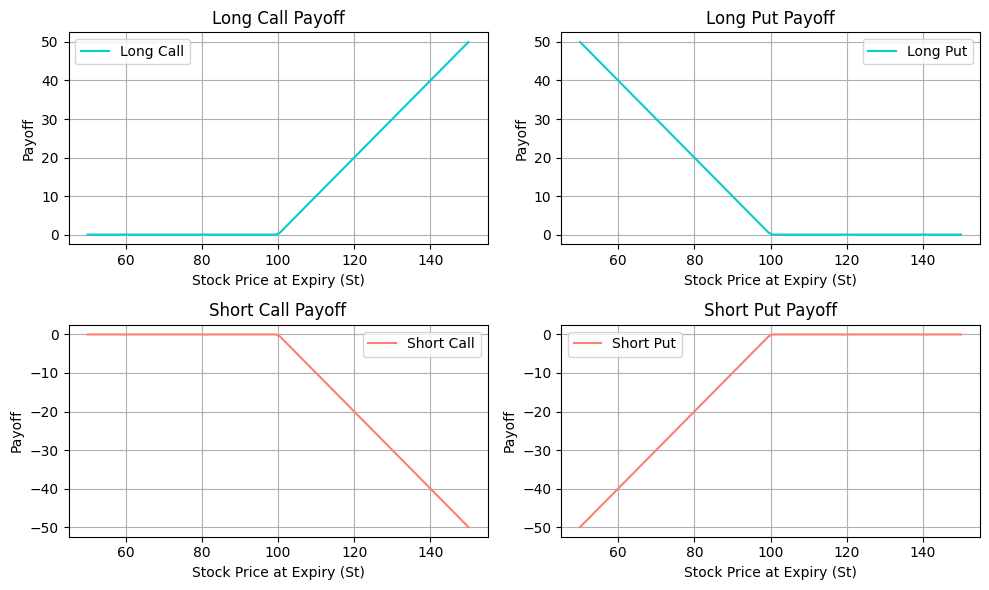

In [3]:
def plot_payoffs(K):
    St = np.linspace(0.5 * K, 1.5 * K, 100)
    
    call_payoff = np.maximum(St - K, 0)
    put_payoff = np.maximum(K - St, 0)
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # Create a 2x2 grid of subplots
    
    # Long Call
    axes[0, 0].plot(St, call_payoff, label='Long Call', color='darkturquoise')
    axes[0, 0].set_title('Long Call Payoff')
    axes[0, 0].legend()
    axes[0, 0].grid()
    
    # Short Call
    axes[1, 0].plot(St, -call_payoff, label='Short Call', color='salmon')
    axes[1, 0].set_title('Short Call Payoff')
    axes[1, 0].legend()
    axes[1, 0].grid()
    
    # Long Put
    axes[0, 1].plot(St, put_payoff, label='Long Put', color='darkturquoise')
    axes[0, 1].set_title('Long Put Payoff')
    axes[0, 1].legend()
    axes[0, 1].grid()
    
    # Short Put
    axes[1, 1].plot(St, -put_payoff, label='Short Put', color='salmon')
    axes[1, 1].set_title('Short Put Payoff')
    axes[1, 1].legend()
    axes[1, 1].grid()
    
    for ax in axes.flat:
        ax.set_xlabel('Stock Price at Expiry (St)')
        ax.set_ylabel('Payoff')

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# Parameters
K = 100  # Strike price
plot_payoffs(K)

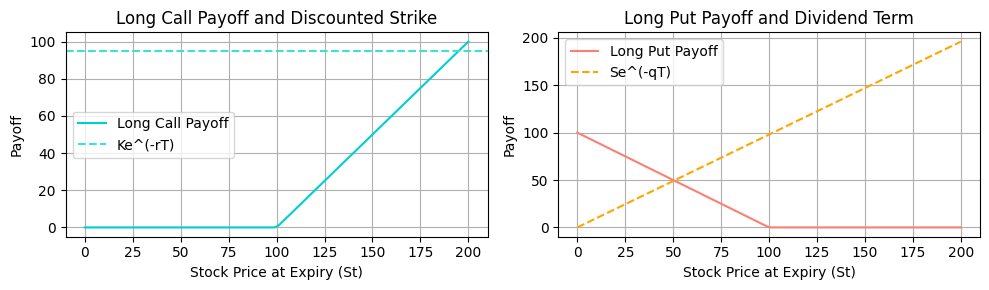

In [4]:
def plot_put_call_parity(K, r, T, q=0):
    St = np.linspace(0, 2 * K, 100)
    call_payoff = np.maximum(St - K, 0)
    put_payoff = np.maximum(K - St, 0)
    discounted_K = K * math.exp(-r * T)
    dividend_term = St * math.exp(-q * T)
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    
    # Plot long call payoff and discounted strike price
    axes[0].plot(St, call_payoff, label='Long Call Payoff', color='darkturquoise')
    axes[0].axhline(y=discounted_K, color='turquoise', linestyle='--', label='Ke^(-rT)')
    axes[0].set_xlabel('Stock Price at Expiry (St)')
    axes[0].set_ylabel('Payoff')
    axes[0].set_title('Long Call Payoff and Discounted Strike')
    axes[0].legend()
    axes[0].grid()
    
    # Plot long put payoff and dividend term
    axes[1].plot(St, put_payoff, label='Long Put Payoff', color='salmon')
    axes[1].plot(St, dividend_term, label='Se^(-qT)', color='orange', linestyle='--')
    axes[1].set_xlabel('Stock Price at Expiry (St)')
    axes[1].set_ylabel('Payoff')
    axes[1].set_title('Long Put Payoff and Dividend Term')
    axes[1].legend()
    axes[1].grid()
    
    plt.tight_layout()
    plt.show()

# Parameters
K = 100  # Strike price
r = 0.05  # Risk-free rate
T = 1    # Time to expiry
q = 0.02  # Dividend yield

plot_put_call_parity(K, r, T, q)